## 1. Import Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define the path to import data
path = r"C:\Users\enthu\Desktop\Bootcamps\Instacart Basket Analysis"

In [3]:
path

'C:\\Users\\enthu\\Desktop\\Bootcamps\\Instacart Basket Analysis'

In [4]:
# Import the new prepared data file
cstms_ords_prods = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'customers_orders_products_merged.pkl'))

In [5]:
# Check the columns and rows
cstms_ords_prods.shape

(32434212, 34)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
# Check the column names
cstms_ords_prods.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spenders,frequency_median,customers,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


Security implications need to be addressed. PII data such as first_name and surname need to be dropped.

In [8]:
# Drop personal information
cstms_ords_prods.drop(columns=['first_name','surname'], inplace= True)

In [9]:
# Check whether the columns have been dropped
cstms_ords_prods.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spenders,frequency_median,customers,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


first_name and surname have been dropped.

In [10]:
# Set up a loc function for the new region column
cstms_ords_prods.loc[cstms_ords_prods['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania',
'New Jersey']),'region'] = 'Northeast'
cstms_ords_prods.loc[cstms_ords_prods['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska',
'Kansas','Minnesota','Iowa','Missouri']),'region'] = 'Midwest' 
cstms_ords_prods.loc[cstms_ords_prods['state'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia',
'Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']),'region'] = 'South'
cstms_ords_prods.loc[cstms_ords_prods['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico',
'Alaska','Washington','Oregon','California','Hawaii']),'region'] = 'West'

In [11]:
# Check the amount of values in the region column
cstms_ords_prods['region'].value_counts(dropna= False)

region
South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: count, dtype: int64

In [12]:
# Create an exclusion flag column
cstms_ords_prods.loc[cstms_ords_prods['max_order']>=5, 'exclusion_flag'] = 'Not Excluded'
cstms_ords_prods.loc[cstms_ords_prods['max_order']<5, 'exclusion_flag'] = 'Excluded'

In [13]:
# Check the amount of values in the exclusion_flag column
cstms_ords_prods['exclusion_flag'].value_counts()

exclusion_flag
Not Excluded    30992664
Excluded         1441548
Name: count, dtype: int64

In [14]:
# Create a dataframe without the excluded data
cstms_ords_prods_not_excluded = cstms_ords_prods[cstms_ords_prods['exclusion_flag']=='Not Excluded']

In [15]:
# Export the new dataframe
cstms_ords_prods_not_excluded.to_pickle(os.path.join(path,'Data','Prepared Data','customers_orders_products_not_excluded'))

In [16]:
# Create a new column for different age categories
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['age'] < 18,'age_type'] = 'Teenager'
cstms_ords_prods_not_excluded.loc[(cstms_ords_prods_not_excluded['age'] >= 18) & (cstms_ords_prods_not_excluded['age'] <= 25),'age_type'] = 'Young Adult'
cstms_ords_prods_not_excluded.loc[(cstms_ords_prods_not_excluded['age'] >= 26) & (cstms_ords_prods_not_excluded['age'] <= 44),'age_type'] = 'Adult'
cstms_ords_prods_not_excluded.loc[(cstms_ords_prods_not_excluded['age'] >= 45) & (cstms_ords_prods_not_excluded['age'] <= 59),'age_type'] = 'Middle age'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['age'] >= 60,'age_type'] = 'Senior'

C:\Users\enthu\AppData\Local\Temp\ipykernel_5816\2887388057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['age'] < 18,'age_type'] = 'Teenager'


In [17]:
# Check the values in the new age_type column
cstms_ords_prods_not_excluded['age_type'].value_counts(dropna= False)

age_type
Senior         10583941
Adult           9222501
Middle age      7318056
Young Adult     3868166
Name: count, dtype: int64

There are no customers who are under 18 years old.

In [18]:
# Create a new column for different income categories
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['income'] <= 50000,'income_type'] = 'Low'
cstms_ords_prods_not_excluded.loc[(cstms_ords_prods_not_excluded['income'] > 50000) & (cstms_ords_prods_not_excluded['income'] <= 100000),'income_type'] = 'Middle'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['income'] > 100000,'income_type'] = 'High'

C:\Users\enthu\AppData\Local\Temp\ipykernel_5816\1267734229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['income'] <= 50000,'income_type'] = 'Low'


In [19]:
# Check the values in the new income_type column
cstms_ords_prods_not_excluded['income_type'].value_counts(dropna= False)

income_type
High      14219044
Middle    13407471
Low        3366149
Name: count, dtype: int64

In [20]:
# Check the values in the n_dependants column
cstms_ords_prods_not_excluded['n_dependants'].value_counts(dropna= False)

n_dependants
3    7779452
0    7747032
2    7740199
1    7725981
Name: count, dtype: int64

In [21]:
# Create a new column for different dependant types
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['n_dependants'] == 0,'dependant_type'] = 'No dependants'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['n_dependants'] > 0,'dependant_type'] = 'Has dependants'

C:\Users\enthu\AppData\Local\Temp\ipykernel_5816\1720752660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['n_dependants'] == 0,'dependant_type'] = 'No dependants'


In [22]:
# Check the values in the new dependant_type column
cstms_ords_prods_not_excluded['dependant_type'].value_counts(dropna= False)

dependant_type
Has dependants    23245632
No dependants      7747032
Name: count, dtype: int64

## 2. Visualizations

In [23]:
cstms_ords_prods_not_excluded['fam_status'].value_counts(dropna= False)

fam_status
married                             21763021
single                               5099271
divorced/widowed                     2647761
living with parents and siblings     1482611
Name: count, dtype: int64

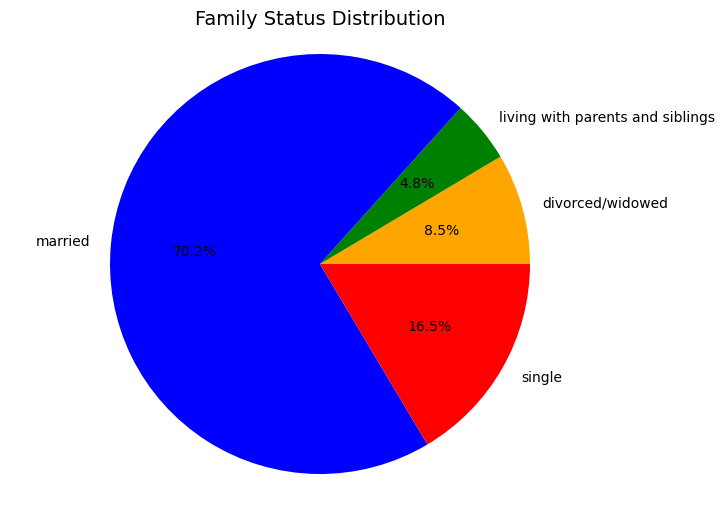

In [24]:
# Create a pie chart for the distribution of family status and export it as a png file
fam_status_distribution = (cstms_ords_prods_not_excluded['fam_status'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6))  
plt.pie(fam_status_distribution, labels=fam_status_distribution.index, autopct='%1.1f%%', colors=['orange', 'green', 'blue','red'])
plt.title('Family Status Distribution', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pie_fam_status.png'))

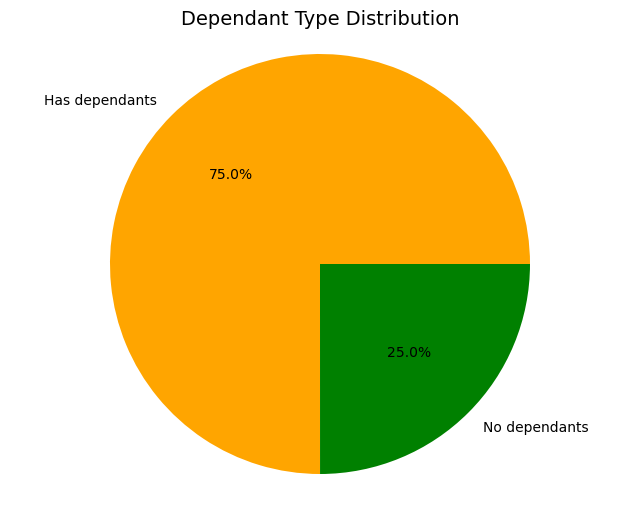

In [25]:
# Create a pie chart fot the distribution of dependant types and export it as a png file
dependant_distribution = (cstms_ords_prods_not_excluded['dependant_type'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6))  
plt.pie(dependant_distribution, labels=dependant_distribution.index, autopct='%1.1f%%', colors=['orange', 'green'])
plt.title('Dependant Type Distribution', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pie_dependant_types.png'))

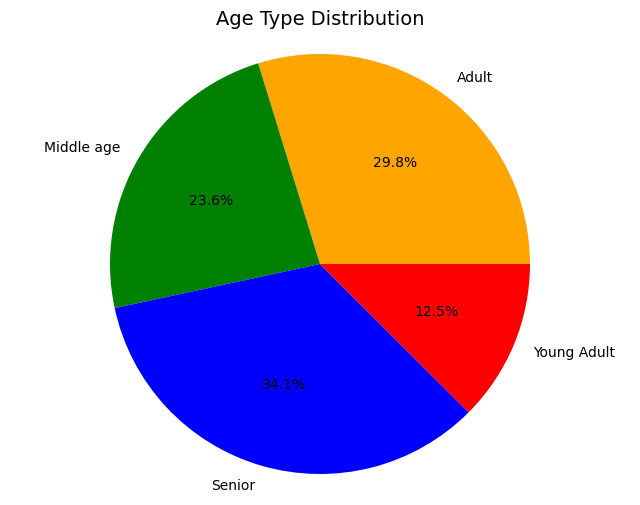

In [26]:
# Create a pie chart for the distribution of age types and export it as a png file
age_type_distribution = (cstms_ords_prods_not_excluded['age_type'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6))  
plt.pie(age_type_distribution, labels=age_type_distribution.index, autopct='%1.1f%%', colors=['orange', 'green', 'blue','red'])
plt.title('Age Type Distribution', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pie_age_types.png'))

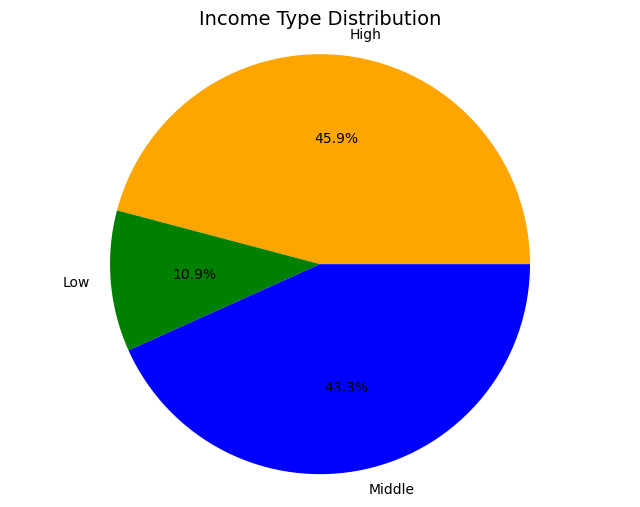

In [27]:
# Create a pie chart for the distribution of income types and export it as a png file
income_type_distribution = (cstms_ords_prods_not_excluded['income_type'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6)) 
plt.pie(income_type_distribution, labels=income_type_distribution.index, autopct='%1.1f%%', colors=['orange', 'green', 'blue'])
plt.title('Income Type Distribution', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pie_income_types.png'))

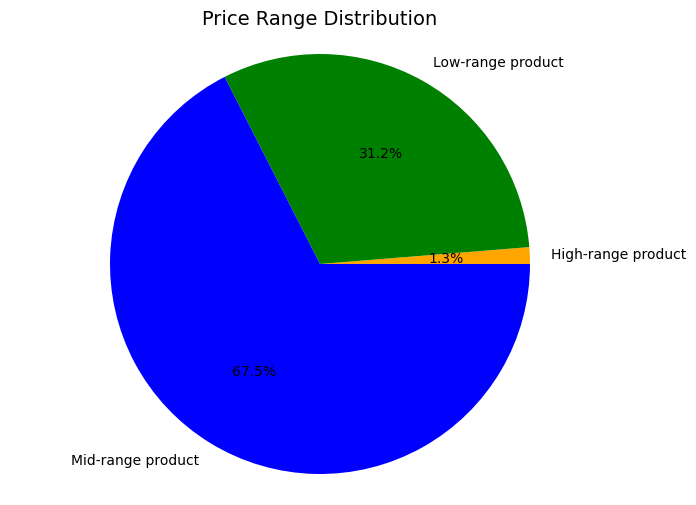

In [28]:
# Create a pie chart fot the distribution of price ranges
price_range_distribution = (cstms_ords_prods_not_excluded['price_range_loc'].value_counts(normalize=True) * 100).sort_index()
plt.figure(figsize=(8, 6))  
plt.pie(price_range_distribution, labels=price_range_distribution.index, autopct='%1.1f%%', colors=['orange', 'green', 'blue'])
plt.title('Price Range Distribution', fontsize=14)
plt.axis('equal') 
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pie_price_ranges.png'))

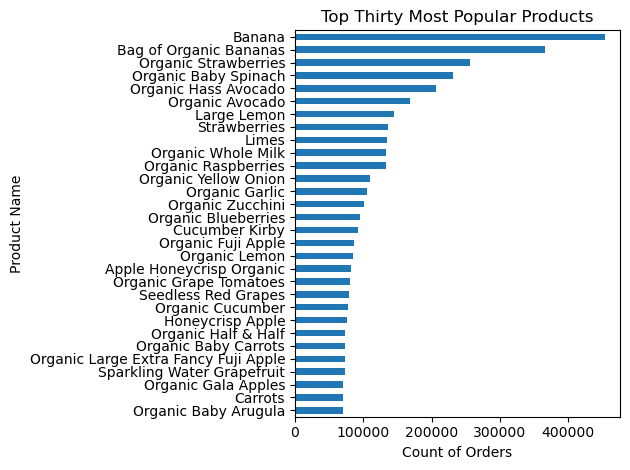

In [29]:
# Create a horizontal bar chart for the top 30 most popular products
different_products = cstms_ords_prods_not_excluded['product_name'].value_counts().nlargest(30).sort_values(ascending=True).plot.barh()
plt.title('Top Thirty Most Popular Products')
plt.xlabel('Count of Orders')
plt.ylabel('Product Name')
plt.tight_layout()

In [30]:
# Export the horizontal bar chart as a png file
different_products.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_top_30_products.png'))

In [31]:
# Check the values in the department_id column
cstms_ords_prods_not_excluded['department_id'].value_counts()

department_id
4     9079276
16    5191828
19    2766406
7     2571934
1     2123342
13    1782903
3     1125026
15    1012074
20    1003834
9      822136
17     699858
14     678095
12     674785
11     424415
18     410392
6      255991
5      144674
8       93065
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [32]:
# Create a new column to identify different department IDs
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 1,'department_name'] = 'frozen'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 2,'department_name'] = 'other'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 3,'department_name'] = 'bakery'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 4,'department_name'] = 'produce'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 5,'department_name'] = 'alcohol'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 6,'department_name'] = 'international'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 7,'department_name'] = 'beverages'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 8,'department_name'] = 'pets'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 9,'department_name'] = 'dry goods pasta'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 10,'department_name'] = 'bulk'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 11,'department_name'] = 'personal care'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 12,'department_name'] = 'meawt seafood'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 13,'department_name'] = 'pantry'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 14,'department_name'] = 'breakfast'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 15,'department_name'] = 'canned goods'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 16,'department_name'] = 'dasiry eggs'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 17,'department_name'] = 'household'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 18,'department_name'] = 'babies'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 19,'department_name'] = 'snacks'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 20,'department_name'] = 'deli'
cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 21,'department_name'] = 'missing'

C:\Users\enthu\AppData\Local\Temp\ipykernel_5816\2914331208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cstms_ords_prods_not_excluded.loc[cstms_ords_prods_not_excluded['department_id'] == 1,'department_name'] = 'frozen'


In [33]:
# Double check the values in the department_name column
cstms_ords_prods_not_excluded['department_name'].value_counts()

department_name
produce            9079276
dasiry eggs        5191828
snacks             2766406
beverages          2571934
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           678095
meawt seafood       674785
personal care       424415
babies              410392
international       255991
alcohol             144674
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

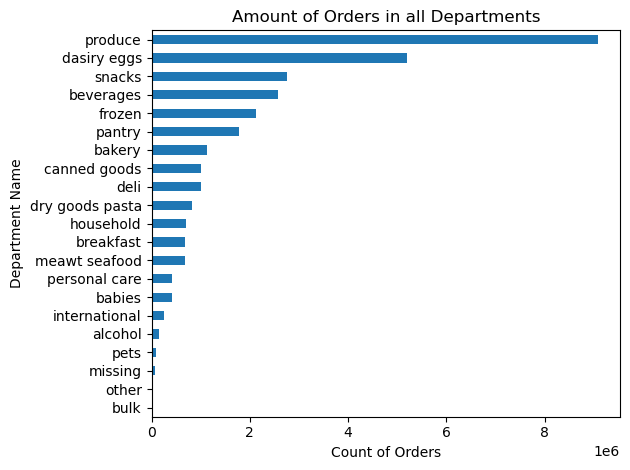

In [34]:
# Create a horizontal bar chart for the amount of orders in all departments
barh_ords_depts = cstms_ords_prods_not_excluded['department_name'].value_counts().nlargest(30).sort_values(ascending=True).plot.barh()
plt.title('Amount of Orders in all Departments')
plt.xlabel('Count of Orders')
plt.ylabel('Department Name')
plt.tight_layout()

In [35]:
# Export the horizontal bar chart as a png file
barh_ords_depts.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'barh_orders_in_departments.png'))

In [36]:
# Create a dataframe for total spending grouped by days of the week
avg_spending_days = cstms_ords_prods_not_excluded.groupby(['orders_day_of_week'])['prices'].sum()

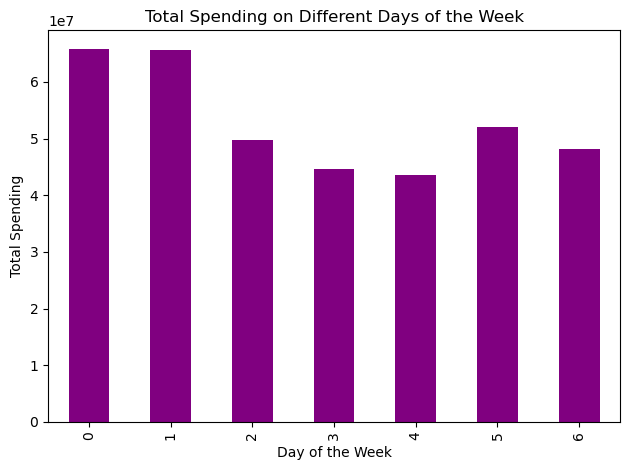

In [37]:
# Create a bar chart for total spending grouped by days of the week 
bar_total_spending_days = avg_spending_days.plot.bar(color='purple')
plt.title('Total Spending on Different Days of the Week')
plt.ylabel('Total Spending')
plt.xlabel('Day of the Week')
plt.tight_layout()

In [38]:
# Export the bar chart as a png file
bar_total_spending_days.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_total_spending_days.png'))

In [39]:
# Create a dataframe for total spending grouped by hours of the day
total_spending_hours = cstms_ords_prods_not_excluded.groupby(['order_hour_of_day'])['prices'].mean()

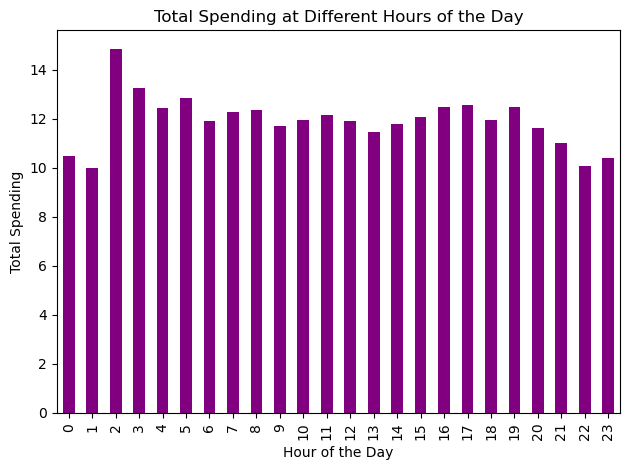

In [40]:
# Create a bar chart for average spending grouped by hours of the day
bar_total_spending_hours = total_spending_hours.plot.bar(color='purple')
plt.title('Total Spending at Different Hours of the Day')
plt.ylabel('Total Spending')
plt.xlabel('Hour of the Day')
plt.tight_layout()

In [41]:
# Export the bar chart as a png file
bar_total_spending_hours.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_total_spending_hours.png'))

In [42]:
# Create a dataframe for orders at 2 am
order_hour_at_2am = cstms_ords_prods_not_excluded[cstms_ords_prods_not_excluded['order_hour_of_day'] == 2]

In [43]:
order_hour_at_2am.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spenders,frequency_median,customers,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag,age_type,income_type,dependant_type,department_name
6121,2698935,1024,prior,59,6,2,2.0,17902,2,1,both,Liquid Egg Whites,86,16,11.8,Mid-range product,Regularly busy,Regularly busy,Fewest orders,99,Loyal customer,11.071533,High spender,1.0,Frequent customer,Male,Arkansas,52,2/22/2018,0,single,100515,South,Not Excluded,Middle age,High,No dependants,dasiry eggs
6181,2698935,1024,prior,59,6,2,2.0,33249,1,1,both,Organic Cooked Beets,83,4,12.6,Mid-range product,Regularly busy,Regularly busy,Fewest orders,99,Loyal customer,11.071533,High spender,1.0,Frequent customer,Male,Arkansas,52,2/22/2018,0,single,100515,South,Not Excluded,Middle age,High,No dependants,produce
8425,2813049,1540,prior,7,2,2,8.0,30450,6,1,both,Creamy Almond Butter,88,13,3.2,Low-range product,Regularly busy,Regularly busy,Fewest orders,28,Regular customer,6.607122,Low spender,7.0,Frequent customer,Male,Florida,76,11/24/2017,3,married,53340,South,Not Excluded,Senior,Middle,Has dependants,pantry
8441,2813049,1540,prior,7,2,2,8.0,39657,1,1,both,Milk Chocolate Almonds,45,19,6.8,Mid-range product,Regularly busy,Regularly busy,Fewest orders,28,Regular customer,6.607122,Low spender,7.0,Frequent customer,Male,Florida,76,11/24/2017,3,married,53340,South,Not Excluded,Senior,Middle,Has dependants,snacks
8509,2813049,1540,prior,7,2,2,8.0,41400,2,1,both,Crunchy Oats 'n Honey Granola Bars,3,19,2.5,Low-range product,Regularly busy,Regularly busy,Fewest orders,28,Regular customer,6.607122,Low spender,7.0,Frequent customer,Male,Florida,76,11/24/2017,3,married,53340,South,Not Excluded,Senior,Middle,Has dependants,snacks


In [44]:
# Create a dataframe for total spending at 2 am grouped by departments
total_spend_2am_departments = order_hour_at_2am.groupby(['department_name'])['order_hour_of_day'].sum()

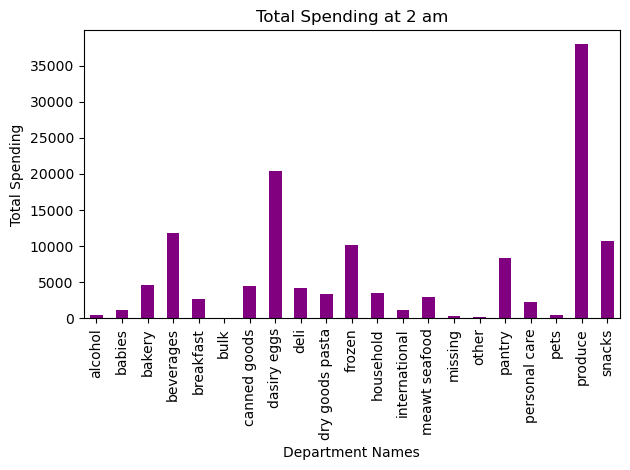

In [45]:
# Create a bar chart for total spending at 2 am grouped by departments
bar_total_spending_2am_departments = total_spend_2am_departments.plot.bar(color='purple')
plt.title('Total Spending at 2 am')
plt.ylabel('Total Spending')
plt.xlabel('Department Names')
plt.tight_layout()

In [46]:
# Export the bar chart as a png file
bar_total_spending_2am_departments.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_total_spending_2am.png'))

In [47]:
# Create a dataframe for orders at 3 am
order_hour_at_3am = cstms_ords_prods_not_excluded[cstms_ords_prods_not_excluded['order_hour_of_day'] == 3]

In [48]:
order_hour_at_3am.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spenders,frequency_median,customers,gender,state,age,date_joined,n_dependants,fam_status,income,region,exclusion_flag,age_type,income_type,dependant_type,department_name
6132,3114721,1024,prior,78,1,3,1.0,17902,1,1,both,Liquid Egg Whites,86,16,11.8,Mid-range product,Regularly busy,Busiest days,Fewest orders,99,Loyal customer,11.071533,High spender,1.0,Frequent customer,Male,Arkansas,52,2/22/2018,0,single,100515,South,Not Excluded,Middle age,High,No dependants,dasiry eggs
6190,3114721,1024,prior,78,1,3,1.0,33249,2,1,both,Organic Cooked Beets,83,4,12.6,Mid-range product,Regularly busy,Busiest days,Fewest orders,99,Loyal customer,11.071533,High spender,1.0,Frequent customer,Male,Arkansas,52,2/22/2018,0,single,100515,South,Not Excluded,Middle age,High,No dependants,produce
8427,1604797,1540,prior,9,1,3,28.0,30450,5,1,both,Creamy Almond Butter,88,13,3.2,Low-range product,Regularly busy,Busiest days,Fewest orders,28,Regular customer,6.607122,Low spender,7.0,Frequent customer,Male,Florida,76,11/24/2017,3,married,53340,South,Not Excluded,Senior,Middle,Has dependants,pantry
8443,1604797,1540,prior,9,1,3,28.0,39657,1,1,both,Milk Chocolate Almonds,45,19,6.8,Mid-range product,Regularly busy,Busiest days,Fewest orders,28,Regular customer,6.607122,Low spender,7.0,Frequent customer,Male,Florida,76,11/24/2017,3,married,53340,South,Not Excluded,Senior,Middle,Has dependants,snacks
8526,1604797,1540,prior,9,1,3,28.0,16953,8,1,both,Creamy Peanut Butter,88,13,11.5,Mid-range product,Regularly busy,Busiest days,Fewest orders,28,Regular customer,6.607122,Low spender,7.0,Frequent customer,Male,Florida,76,11/24/2017,3,married,53340,South,Not Excluded,Senior,Middle,Has dependants,pantry


In [49]:
# Create a dataframe for total spending at 3 am grouped by departments
total_spend_3am_departments = order_hour_at_3am.groupby(['department_name'])['order_hour_of_day'].sum()

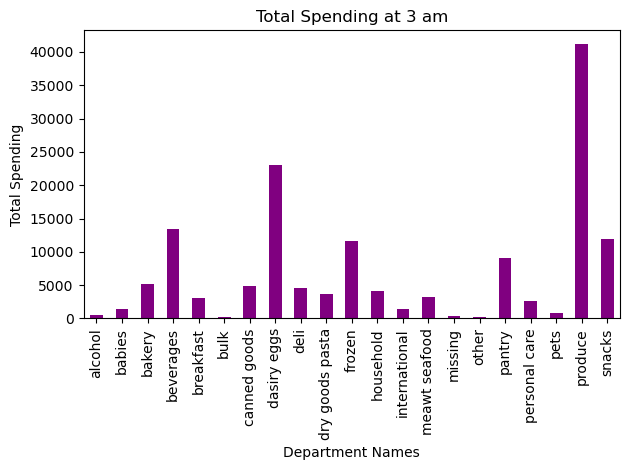

In [50]:
# Create a bar chart for total spending at 3 am grouped by departments
bar_total_spending_3am_departments = total_spend_3am_departments.plot.bar(color='purple')
plt.title('Total Spending at 3 am')
plt.ylabel('Total Spending')
plt.xlabel('Department Names')
plt.tight_layout()

In [51]:
# Export the bar chart as a png file
bar_total_spending_3am_departments.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_total_spending_3am.png'))

In [52]:
# Create a dataframe for average spending grouped by regions
avg_spending_regions = cstms_ords_prods_not_excluded.groupby(['region'])['average_price'].mean()

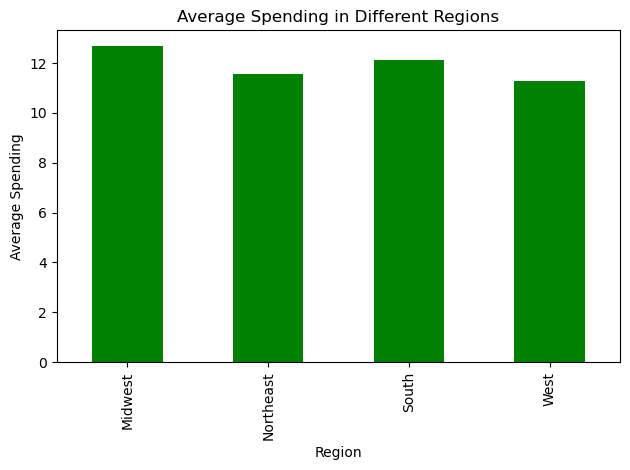

In [53]:
# Create a bar chart for average spending grouped by regions
bar_avg_spending_regions = avg_spending_regions.plot.bar(color='green')
plt.title('Average Spending in Different Regions')
plt.ylabel('Average Spending')
plt.xlabel('Region')
plt.tight_layout()

In [54]:
# Export the bar chart as a png file
bar_avg_spending_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_average_spending_regions.png'))

In [55]:
# Create a dataframe for the total spending grouped by regions
sum_spending_regions = cstms_ords_prods_not_excluded.groupby(['region'])['prices'].sum()

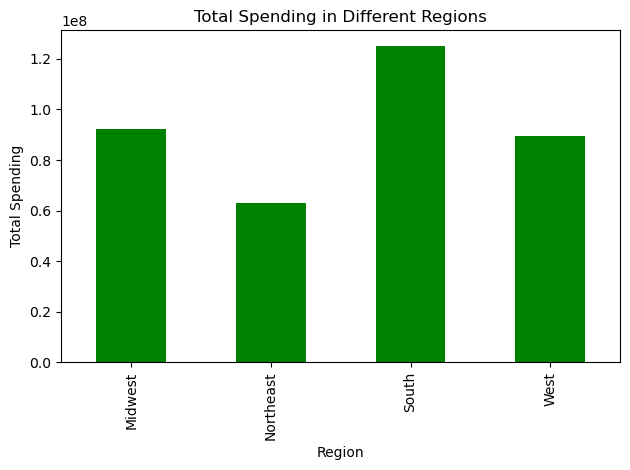

In [56]:
# Create a bar chart for the total spending grouped by regions
bar_sum_spending_regions = sum_spending_regions.sort_index().plot.bar(color='green')
plt.title('Total Spending in Different Regions')
plt.ylabel('Total Spending')
plt.xlabel('Region')
plt.tight_layout()

In [57]:
# Export the bar chart as a png file
bar_sum_spending_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_total_spending_regions.png'))

In [58]:
# Create a dataframe for total income grouped by regions
sum_income_regions = cstms_ords_prods_not_excluded.groupby(['region'])['income'].sum()

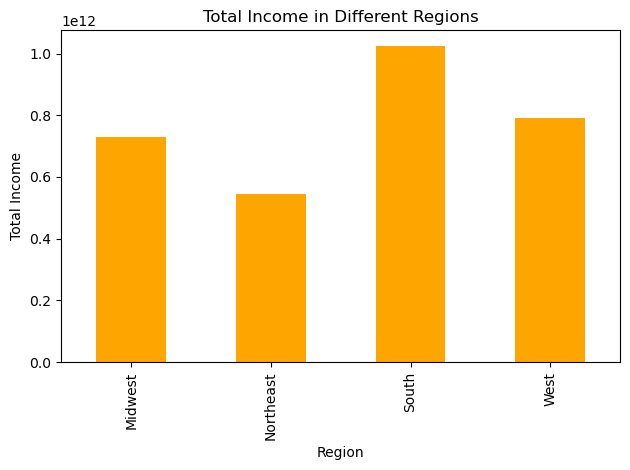

In [59]:
# Create a bar chart for total income grouped by regions
bar_sum_income_regions = sum_income_regions.sort_index().plot.bar(color='orange')
plt.title('Total Income in Different Regions')
plt.ylabel('Total Income')
plt.xlabel('Region')
plt.tight_layout()

In [60]:
# Export the histogram as a png file
bar_sum_income_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_total_income_regions.png'))

In [61]:
# Create a dataframe for average income grouped by regions
avg_income_regions = cstms_ords_prods_not_excluded.groupby(['region'])['income'].mean()

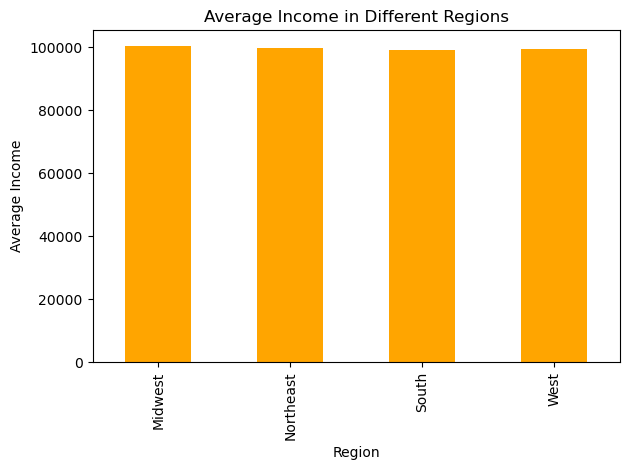

In [62]:
# Create a bar chart fot average income grouped by regions
bar_avg_income_regions = avg_income_regions.sort_index().plot.bar(color='orange')
plt.title('Average Income in Different Regions')
plt.ylabel('Average Income')
plt.xlabel('Region')
plt.tight_layout()

In [63]:
# Export the bar chart as a png file
bar_avg_income_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_average_income_regions.png'))

In [64]:
# Create a dataframe for total amount of customers goruped by regions
total_customers_regions = cstms_ords_prods_not_excluded.groupby(['region'])['user_id'].nunique()

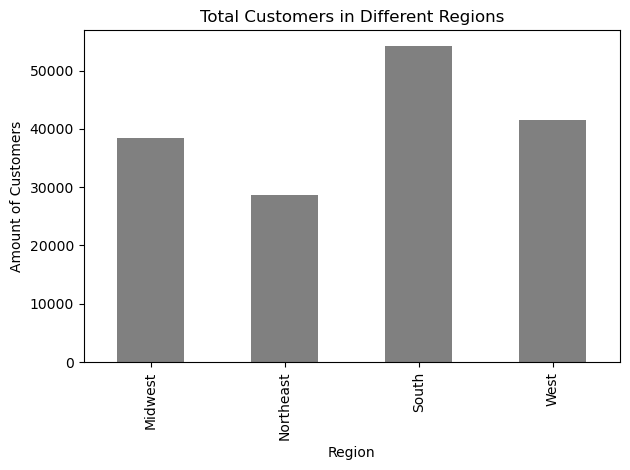

In [65]:
# Create a bar chart fot total amount of customers grouped by regions
bar_total_customers_regions = total_customers_regions.sort_index().plot.bar(color='grey')
plt.title('Total Customers in Different Regions')
plt.ylabel('Amount of Customers')
plt.xlabel('Region')
plt.tight_layout()

In [66]:
# Export the bar chart as a png file
bar_total_customers_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_total_customers_regions.png'))

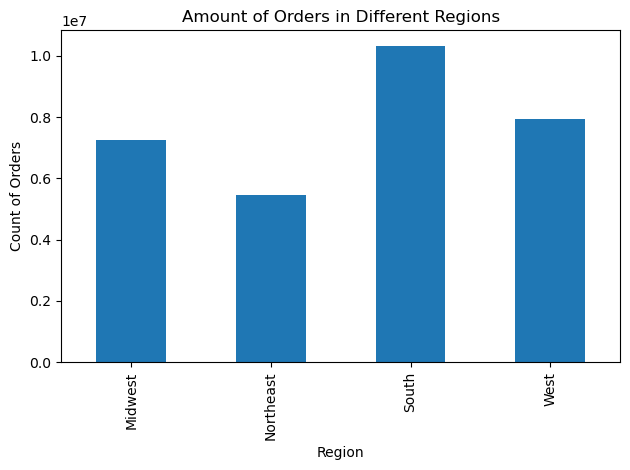

In [67]:
# Create a bar chart for the amount of orders in different regions
bar_orders_in_regions = cstms_ords_prods_not_excluded['region'].value_counts().sort_index().plot.bar()
plt.title('Amount of Orders in Different Regions')
plt.ylabel('Count of Orders')
plt.xlabel('Region')
plt.tight_layout()

In [68]:
# Export the bar chart as a png file
bar_orders_in_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_amount_of_orders_regions.png'))

C:\Users\enthu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Region')

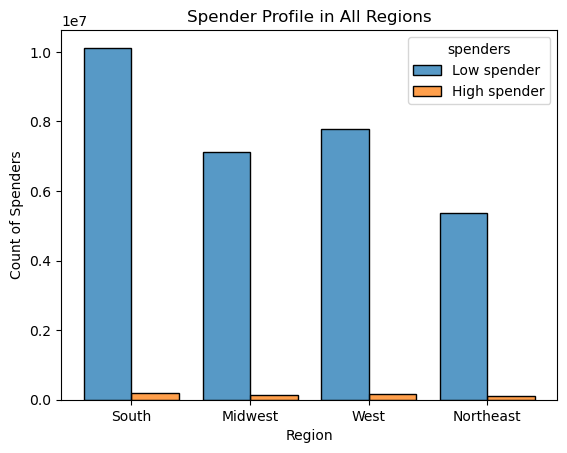

In [69]:
# Create a histogram for the counts of different spenders grouped by regions
histplot_spenders_regions = sns.histplot(data=cstms_ords_prods_not_excluded,x ='region',hue='spenders',multiple='dodge',shrink=.8)
plt.title('Spender Profile in All Regions')
plt.ylabel('Count of Spenders')
plt.xlabel('Region')

In [70]:
# Export the histogram as a png file
histplot_spenders_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'histplot_spender_profile_regions.png'))

C:\Users\enthu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Region')

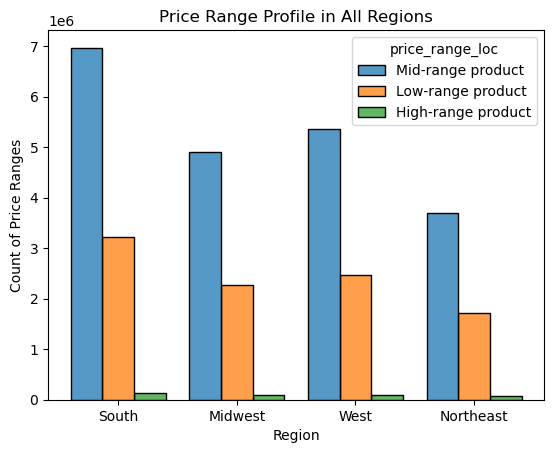

In [71]:
# Create a histogram for different price ranges grouped by regions
histplot_price_ranges_regions = sns.histplot(data=cstms_ords_prods_not_excluded,x ='region',hue='price_range_loc',multiple='dodge',shrink=.8)
plt.title('Price Range Profile in All Regions')
plt.ylabel('Count of Price Ranges')
plt.xlabel('Region')

In [72]:
# Export the histogram as a png file
histplot_price_ranges_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'histplot_price_ranges_regions.png'))

C:\Users\enthu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Region')

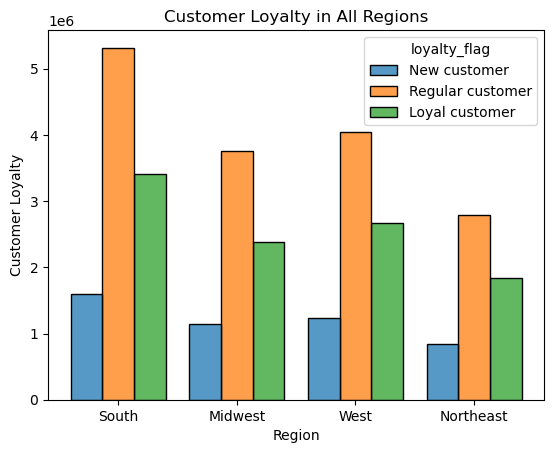

In [73]:
# Create a histogram for different customer loyalty grouped by regions
histplot_price_ranges_regions = sns.histplot(data=cstms_ords_prods_not_excluded,x ='region',hue='loyalty_flag',multiple='dodge',shrink=.8)
plt.title('Customer Loyalty in All Regions')
plt.ylabel('Customer Loyalty')
plt.xlabel('Region')

In [74]:
# Export the histogram as a png file
histplot_price_ranges_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'histplot_customer_loyalty_regions.png'))

C:\Users\enthu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Region')

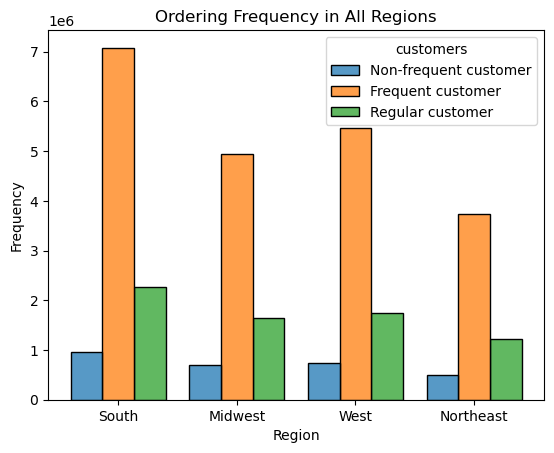

In [75]:
# Create a histogram for different customer ordering frequency in all regions
histplot_order_frequency_regions = sns.histplot(data=cstms_ords_prods_not_excluded,x ='region',hue='customers',multiple='dodge',shrink=.8)
plt.title('Ordering Frequency in All Regions')
plt.ylabel('Frequency')
plt.xlabel('Region')

In [76]:
# Export the histogram as a png file
histplot_order_frequency_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'histplot_ordering_frequency_regions.png'))

C:\Users\enthu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Region')

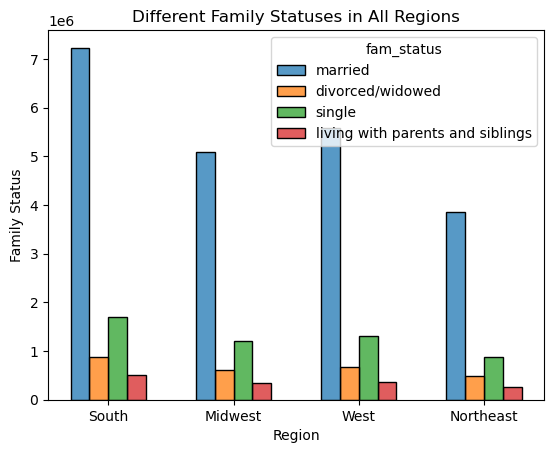

In [77]:
# Create a histogram for different family statuses in all regions
histplot_fam_status_regions = sns.histplot(data=cstms_ords_prods_not_excluded,x ='region',hue='fam_status',multiple='dodge',shrink=0.6)
plt.title('Different Family Statuses in All Regions')
plt.ylabel('Family Status')
plt.xlabel('Region')

In [78]:
# Export the bar chart as a png file
histplot_fam_status_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'histplot_fam_status_regions.png'))

C:\Users\enthu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Region')

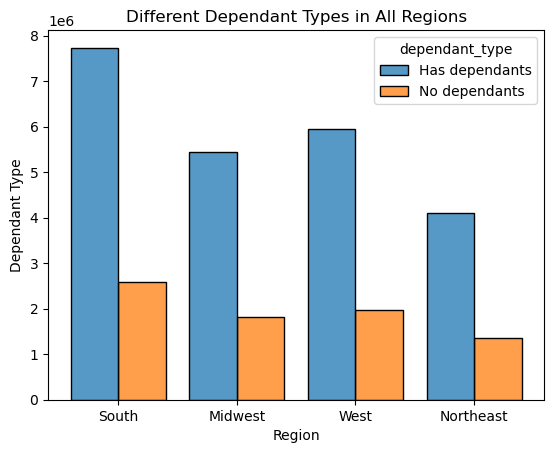

In [79]:
# Create a histogram for different dependant types goruped by regions
histplot_dependant_types_regions = sns.histplot(data=cstms_ords_prods_not_excluded,x ='region',hue='dependant_type',multiple='dodge',shrink=.8)
plt.title('Different Dependant Types in All Regions')
plt.ylabel('Dependant Type')
plt.xlabel('Region')

In [80]:
# Export the histogram as a png file
histplot_dependant_types_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'histplot_dependant_types_regions.png'))

C:\Users\enthu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Region')

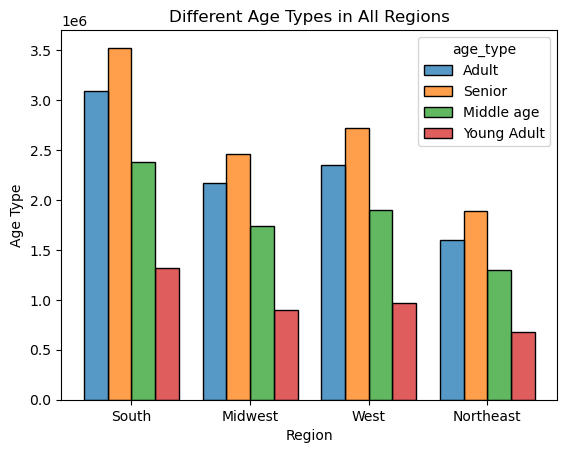

In [81]:
# Create a histogram for different age types goruped by regions
histplot_age_types_regions = sns.histplot(data=cstms_ords_prods_not_excluded,x ='region',hue='age_type',multiple='dodge',shrink=.8)
plt.title('Different Age Types in All Regions')
plt.ylabel('Age Type')
plt.xlabel('Region')

In [82]:
# Export the histogram as a png file
histplot_age_types_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'histplot_age_types_regions.png'))

C:\Users\enthu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Region')

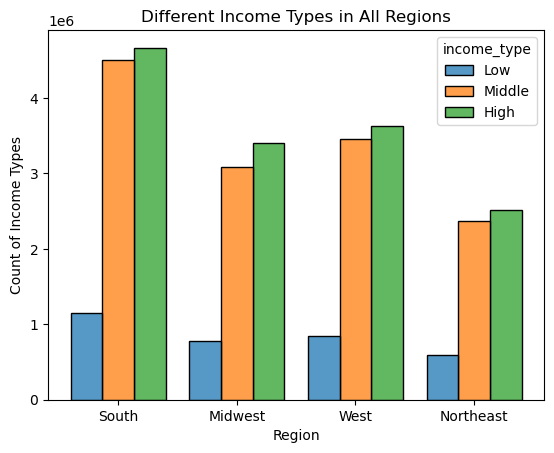

In [84]:
# Create a histogram for different income types grouped by regions
histplot_income_types_regions = sns.histplot(data=cstms_ords_prods_not_excluded,x ='region',hue='income_type',multiple='dodge',shrink=.8)
plt.title('Different Income Types in All Regions')
plt.ylabel('Count of Income Types')
plt.xlabel('Region')

In [85]:
# Export the histogram as a png file
histplot_income_types_regions.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'histplot_income_types_regions.png'))

In [92]:
cstms_ords_prods_not_excluded.shape

(30992664, 38)